In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Australia_GP.csv to Australia_GP (3).csv


In [5]:
df = pd.read_csv('Australia_GP.csv')

In [6]:
df.head()

,Unnamed: 0,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0,0 days 01:03:43.368000,16,NaN,1,1,0 days 00:24:52.909000,NaN,NaN,0 days 00:00:18.645000,...,277.0,MEDIUM,1.0,True,0 days 01:02:13.396000,Ferrari,LEC,1,False,2022-04-10 05:03:13.407
1,1,0 days 01:05:08.114000,16,0 days 00:01:24.746000,2,1,NaN,NaN,0 days 00:00:29.566000,0 days 00:00:18.608000,...,280.0,MEDIUM,2.0,True,0 days 01:03:43.368000,Ferrari,LEC,2,True,2022-04-10 05:04:43.379
2,2,0 days 01:06:51.459000,16,0 days 00:01:43.345000,3,1,NaN,NaN,0 days 00:00:29.279000,0 days 00:00:24.719000,...,247.0,MEDIUM,3.0,True,0 days 01:05:08.114000,Ferrari,LEC,264,False,2022-04-10 05:06:08.125
3,3,0 days 01:09:06.561000,16,0 days 00:02:15.102000,4,1,NaN,NaN,0 days 00:00:42.800000,0 days 00:00:30.843000,...,NaN,MEDIUM,4.0,True,0 days 01:06:51.459000,Ferrari,LEC,4,False,2022-04-10 05:07:51.470
4,4,0 days 01:11:21.497000,16,0 days 00:02:14.936000,5,1,NaN,NaN,0 days 00:00:45.666000,0 days 00:00:30.394000,...,134.0,MEDIUM,5.0,True,0 days 01:09:06.561000,Ferrari,LEC,4,False,2022-04-10 05:10:06.572


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1042 non-null   int64  
 1   Time                1042 non-null   object 
 2   DriverNumber        1042 non-null   int64  
 3   LapTime             1005 non-null   object 
 4   LapNumber           1042 non-null   int64  
 5   Stint               1042 non-null   int64  
 6   PitOutTime          42 non-null     object 
 7   PitInTime           22 non-null     object 
 8   Sector1Time         1020 non-null   object 
 9   Sector2Time         1042 non-null   object 
 10  Sector3Time         1042 non-null   object 
 11  Sector1SessionTime  1020 non-null   object 
 12  Sector2SessionTime  1042 non-null   object 
 13  Sector3SessionTime  1042 non-null   object 
 14  SpeedI1             918 non-null    float64
 15  SpeedI2             1042 non-null   float64
 16  SpeedF

In [8]:
def time_sec(s):
  if s.startswith('0 days 00:'):
    s = s[10:]
  (splitted_time,sec) = s.split(":")

  total = float(splitted_time) * 60 + float(sec)
  answer = round(total,3)
  return answer

In [9]:
df.columns

Index(['Unnamed: 0', 'Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Compound', 'TyreLife',
       'FreshTyre', 'LapStartTime', 'Team', 'Driver', 'TrackStatus',
       'IsAccurate', 'LapStartDate'],
      dtype='object')

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:43.368000,16,NaN,1,1,0 days 00:24:52.909000,NaN,NaN,0 days 00:00:18.645000,0 days 00:00:36.781000,...,277.0,MEDIUM,1.0,True,0 days 01:02:13.396000,Ferrari,LEC,1,False,2022-04-10 05:03:13.407
1,0 days 01:05:08.114000,16,0 days 00:01:24.746000,2,1,NaN,NaN,0 days 00:00:29.566000,0 days 00:00:18.608000,0 days 00:00:36.572000,...,280.0,MEDIUM,2.0,True,0 days 01:03:43.368000,Ferrari,LEC,2,True,2022-04-10 05:04:43.379
2,0 days 01:06:51.459000,16,0 days 00:01:43.345000,3,1,NaN,NaN,0 days 00:00:29.279000,0 days 00:00:24.719000,0 days 00:00:49.347000,...,247.0,MEDIUM,3.0,True,0 days 01:05:08.114000,Ferrari,LEC,264,False,2022-04-10 05:06:08.125
3,0 days 01:09:06.561000,16,0 days 00:02:15.102000,4,1,NaN,NaN,0 days 00:00:42.800000,0 days 00:00:30.843000,0 days 00:01:01.459000,...,NaN,MEDIUM,4.0,True,0 days 01:06:51.459000,Ferrari,LEC,4,False,2022-04-10 05:07:51.470
4,0 days 01:11:21.497000,16,0 days 00:02:14.936000,5,1,NaN,NaN,0 days 00:00:45.666000,0 days 00:00:30.394000,0 days 00:00:58.876000,...,134.0,MEDIUM,5.0,True,0 days 01:09:06.561000,Ferrari,LEC,4,False,2022-04-10 05:10:06.572


In [12]:
features = ['LapTime','LapNumber','Stint','Sector1Time','Sector2Time','Sector3Time','Compound','TyreLife','Driver','Team']

In [13]:
df.dropna(subset = features ,inplace=True)

In [14]:
df.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 01:05:08.114000,16,0 days 00:01:24.746000,2,1,NaN,NaN,0 days 00:00:29.566000,0 days 00:00:18.608000,0 days 00:00:36.572000,...,280.0,MEDIUM,2.0,True,0 days 01:03:43.368000,Ferrari,LEC,2,True,2022-04-10 05:04:43.379
2,0 days 01:06:51.459000,16,0 days 00:01:43.345000,3,1,NaN,NaN,0 days 00:00:29.279000,0 days 00:00:24.719000,0 days 00:00:49.347000,...,247.0,MEDIUM,3.0,True,0 days 01:05:08.114000,Ferrari,LEC,264,False,2022-04-10 05:06:08.125
3,0 days 01:09:06.561000,16,0 days 00:02:15.102000,4,1,NaN,NaN,0 days 00:00:42.800000,0 days 00:00:30.843000,0 days 00:01:01.459000,...,NaN,MEDIUM,4.0,True,0 days 01:06:51.459000,Ferrari,LEC,4,False,2022-04-10 05:07:51.470
4,0 days 01:11:21.497000,16,0 days 00:02:14.936000,5,1,NaN,NaN,0 days 00:00:45.666000,0 days 00:00:30.394000,0 days 00:00:58.876000,...,134.0,MEDIUM,5.0,True,0 days 01:09:06.561000,Ferrari,LEC,4,False,2022-04-10 05:10:06.572
5,0 days 01:13:46.450000,16,0 days 00:02:24.953000,6,1,NaN,NaN,0 days 00:00:45.174000,0 days 00:00:31.308000,0 days 00:01:08.471000,...,291.0,MEDIUM,6.0,True,0 days 01:11:21.497000,Ferrari,LEC,4,False,2022-04-10 05:12:21.508


In [15]:
df = df.astype({"LapTime": str}, errors='raise') 
df = df.astype({"Sector1Time": str}, errors='raise') 
df = df.astype({"Sector2Time": str}, errors='raise') 
df = df.astype({"Sector3Time": str}, errors='raise') 

In [16]:
df.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 01:05:08.114000,16,0 days 00:01:24.746000,2,1,NaN,NaN,0 days 00:00:29.566000,0 days 00:00:18.608000,0 days 00:00:36.572000,...,280.0,MEDIUM,2.0,True,0 days 01:03:43.368000,Ferrari,LEC,2,True,2022-04-10 05:04:43.379
2,0 days 01:06:51.459000,16,0 days 00:01:43.345000,3,1,NaN,NaN,0 days 00:00:29.279000,0 days 00:00:24.719000,0 days 00:00:49.347000,...,247.0,MEDIUM,3.0,True,0 days 01:05:08.114000,Ferrari,LEC,264,False,2022-04-10 05:06:08.125
3,0 days 01:09:06.561000,16,0 days 00:02:15.102000,4,1,NaN,NaN,0 days 00:00:42.800000,0 days 00:00:30.843000,0 days 00:01:01.459000,...,NaN,MEDIUM,4.0,True,0 days 01:06:51.459000,Ferrari,LEC,4,False,2022-04-10 05:07:51.470
4,0 days 01:11:21.497000,16,0 days 00:02:14.936000,5,1,NaN,NaN,0 days 00:00:45.666000,0 days 00:00:30.394000,0 days 00:00:58.876000,...,134.0,MEDIUM,5.0,True,0 days 01:09:06.561000,Ferrari,LEC,4,False,2022-04-10 05:10:06.572
5,0 days 01:13:46.450000,16,0 days 00:02:24.953000,6,1,NaN,NaN,0 days 00:00:45.174000,0 days 00:00:31.308000,0 days 00:01:08.471000,...,291.0,MEDIUM,6.0,True,0 days 01:11:21.497000,Ferrari,LEC,4,False,2022-04-10 05:12:21.508


In [17]:
type(df['LapTime'][1])

str

In [18]:
df['LapTime'] = df['LapTime'].map(time_sec)
df['Sector1Time'] = df['Sector1Time'].map(time_sec)
df['Sector2Time'] = df['Sector2Time'].map(time_sec)
df['Sector3Time'] = df['Sector3Time'].map(time_sec)

In [19]:
df.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 01:05:08.114000,16,84.746,2,1,NaN,NaN,29.566,18.608,36.572,...,280.0,MEDIUM,2.0,True,0 days 01:03:43.368000,Ferrari,LEC,2,True,2022-04-10 05:04:43.379
2,0 days 01:06:51.459000,16,103.345,3,1,NaN,NaN,29.279,24.719,49.347,...,247.0,MEDIUM,3.0,True,0 days 01:05:08.114000,Ferrari,LEC,264,False,2022-04-10 05:06:08.125
3,0 days 01:09:06.561000,16,135.102,4,1,NaN,NaN,42.800,30.843,61.459,...,NaN,MEDIUM,4.0,True,0 days 01:06:51.459000,Ferrari,LEC,4,False,2022-04-10 05:07:51.470
4,0 days 01:11:21.497000,16,134.936,5,1,NaN,NaN,45.666,30.394,58.876,...,134.0,MEDIUM,5.0,True,0 days 01:09:06.561000,Ferrari,LEC,4,False,2022-04-10 05:10:06.572
5,0 days 01:13:46.450000,16,144.953,6,1,NaN,NaN,45.174,31.308,68.471,...,291.0,MEDIUM,6.0,True,0 days 01:11:21.497000,Ferrari,LEC,4,False,2022-04-10 05:12:21.508


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 1 to 1041
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                928 non-null    object 
 1   DriverNumber        928 non-null    int64  
 2   LapTime             928 non-null    float64
 3   LapNumber           928 non-null    int64  
 4   Stint               928 non-null    int64  
 5   PitOutTime          19 non-null     object 
 6   PitInTime           22 non-null     object 
 7   Sector1Time         928 non-null    float64
 8   Sector2Time         928 non-null    float64
 9   Sector3Time         928 non-null    float64
 10  Sector1SessionTime  928 non-null    object 
 11  Sector2SessionTime  928 non-null    object 
 12  Sector3SessionTime  928 non-null    object 
 13  SpeedI1             817 non-null    float64
 14  SpeedI2             928 non-null    float64
 15  SpeedFL             906 non-null    float64
 16  SpeedST

In [21]:
df = df.astype({"Compound": str}, errors='raise')

In [22]:
def indexer(s):
  if s == 'SOFT':
    return 0
  if s == 'MEDIUM':
    return 1
  if s == 'HARD':
    return 2

In [23]:
df['Compound'] = df['Compound'].map(indexer)

In [24]:
df.head()
df_new = df.copy()

In [25]:
df.drop(['Time','DriverNumber','PitOutTime','PitInTime','SpeedST','FreshTyre','LapStartTime','TrackStatus','IsAccurate','LapStartDate'],axis=1,inplace=True)
df.drop(['Sector1SessionTime','Sector2SessionTime','Sector3SessionTime','SpeedI1','SpeedI2','SpeedFL'],axis=1,inplace=True)

In [26]:
df.head()

,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Compound,TyreLife,Team,Driver
1,84.746,2,1,29.566,18.608,36.572,1,2.0,Ferrari,LEC
2,103.345,3,1,29.279,24.719,49.347,1,3.0,Ferrari,LEC
3,135.102,4,1,42.800,30.843,61.459,1,4.0,Ferrari,LEC
4,134.936,5,1,45.666,30.394,58.876,1,5.0,Ferrari,LEC
5,144.953,6,1,45.174,31.308,68.471,1,6.0,Ferrari,LEC


In [27]:
df.drop(['Team','Driver'],axis=1,inplace=True)
df.head()

,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Compound,TyreLife
1,84.746,2,1,29.566,18.608,36.572,1,2.0
2,103.345,3,1,29.279,24.719,49.347,1,3.0
3,135.102,4,1,42.800,30.843,61.459,1,4.0
4,134.936,5,1,45.666,30.394,58.876,1,5.0
5,144.953,6,1,45.174,31.308,68.471,1,6.0


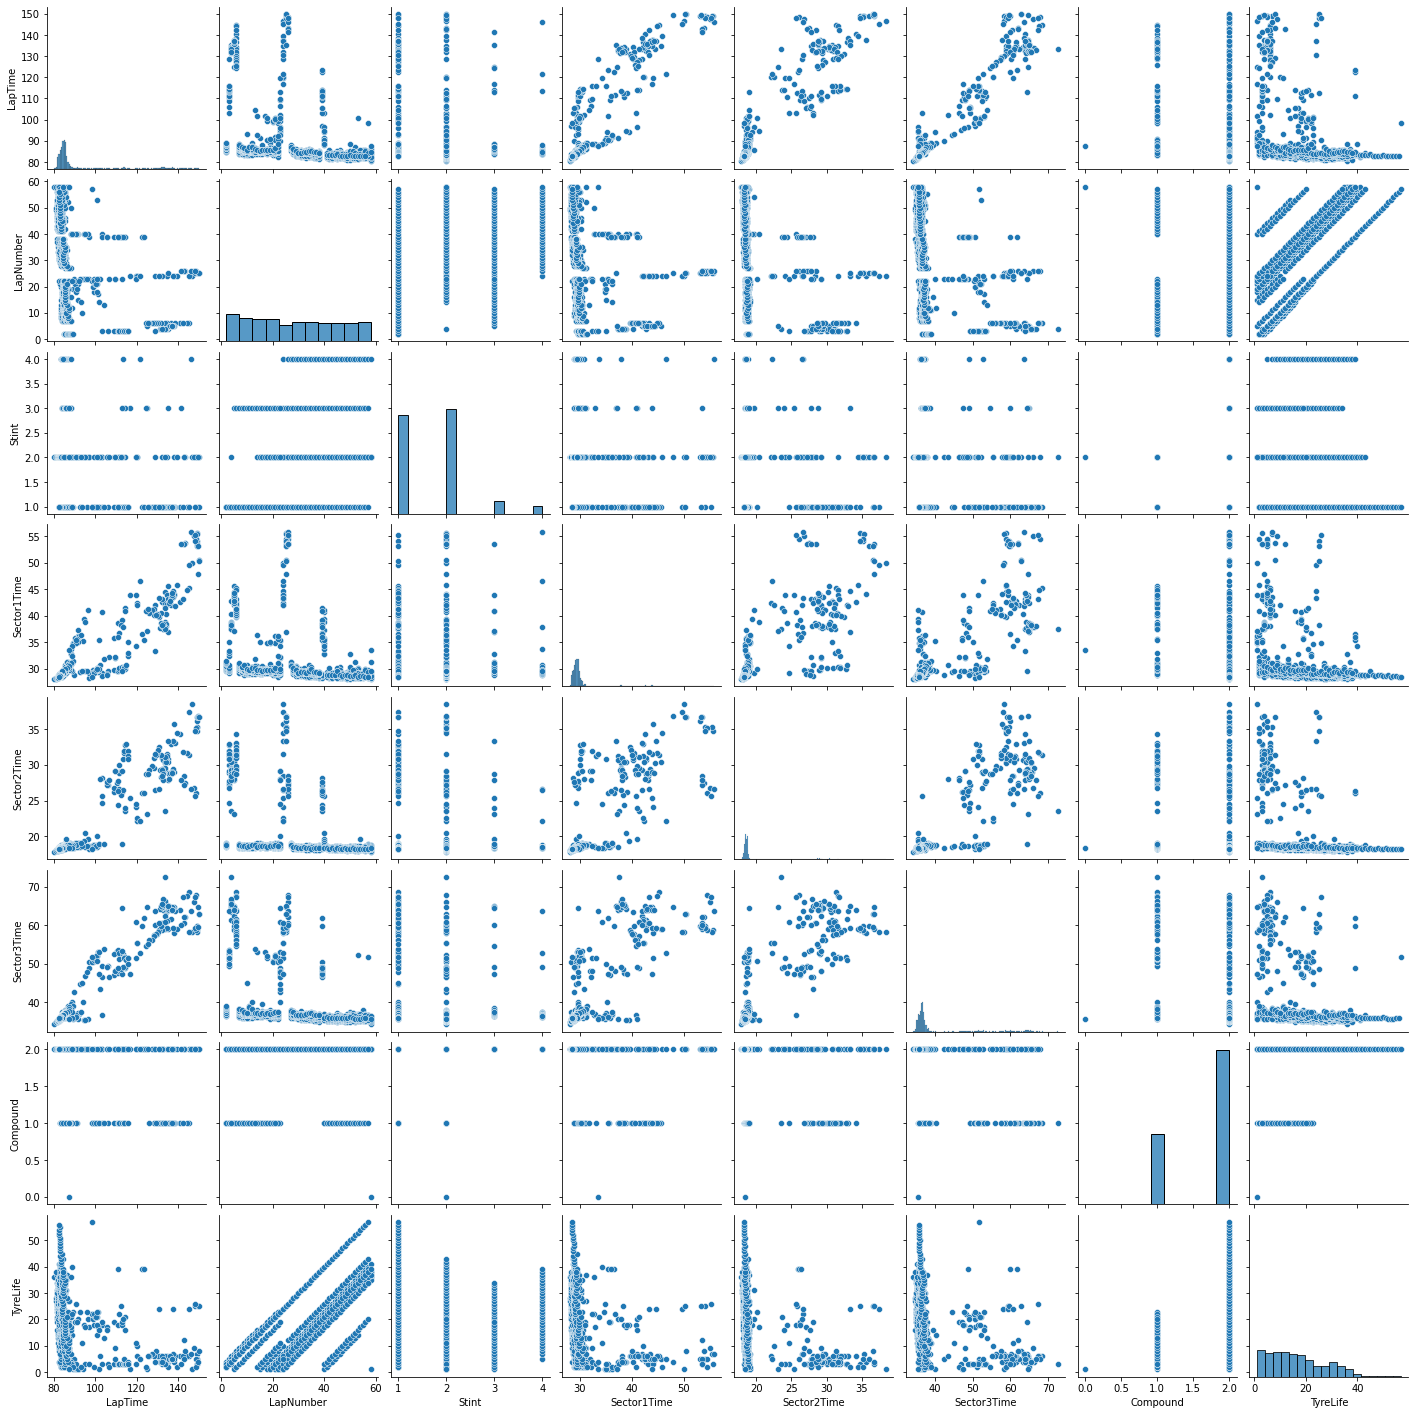

In [28]:
sns.pairplot(df)

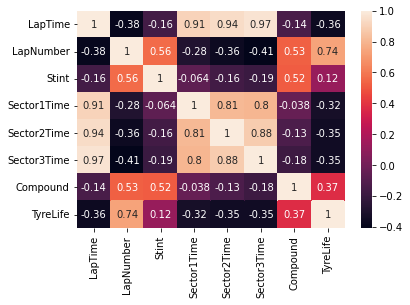

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
df.columns

Index(['LapTime', 'LapNumber', 'Stint', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Compound', 'TyreLife'],
      dtype='object')

In [31]:
X = df[['LapNumber', 'Stint', 'Sector1Time', 'Sector2Time','Compound', 'TyreLife']]

In [32]:
y = df['LapTime']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
print(lm.intercept_)

3.17676321248085


In [39]:
lm.coef_

array([-0.08301749,  0.54445416,  1.40891018,  2.29927116, -1.14459889,
        0.07614573])

In [40]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [41]:
cdf.head()

,Coeff
LapNumber,-0.083017
Stint,0.544454
Sector1Time,1.408910
Sector2Time,2.299271
Compound,-1.144599


In [42]:
predictions = lm.predict(X_test)

In [43]:
predictions

array([ 87.29075131,  85.99490061,  86.976602  ,  88.16162969,
        87.01694445,  84.21334255,  84.02294232,  86.15183368,
        83.39842505,  87.24920324,  86.85997518,  83.85907062,
        85.40810597,  90.73300004,  83.22654343,  87.5136616 ,
        83.66858077,  85.8230559 ,  86.71658708,  87.38897981,
        82.84508776,  87.09630449,  86.34801202,  81.88761093,
        86.1641204 ,  85.27162089, 113.76641748,  81.69864383,
       110.89497038, 123.99999952,  84.03013668,  87.85899474,
        83.28491633,  82.43688138,  83.81545873, 130.03888242,
        83.96715647,  87.11329928,  87.27513804,  83.20436367,
        92.91364502,  83.47812431,  86.73805037, 123.56911938,
        87.35605223,  84.95209997,  89.47585992,  87.23393146,
        86.87346785,  81.54520567,  82.83249295,  83.70843438,
        86.27076632,  85.06956784,  83.27939959,  82.7817284 ,
        82.8378441 ,  85.14713135,  82.86898022,  81.87756626,
        87.84971027,  81.67956371,  84.91522795, 137.00

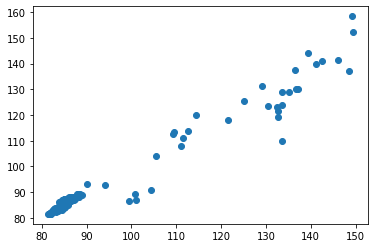

In [44]:
plt.scatter(y_test,predictions)

In [45]:
from sklearn import metrics

In [46]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3.636411444635928

In [47]:
y_test

579     85.919
777     85.292
339     84.956
740     86.147
396     85.595
        ...   
436     82.980
967     83.951
24     149.175
419     85.264
159    136.529
Name: LapTime, Length: 186, dtype: float64

In [48]:
predictions

array([ 87.29075131,  85.99490061,  86.976602  ,  88.16162969,
        87.01694445,  84.21334255,  84.02294232,  86.15183368,
        83.39842505,  87.24920324,  86.85997518,  83.85907062,
        85.40810597,  90.73300004,  83.22654343,  87.5136616 ,
        83.66858077,  85.8230559 ,  86.71658708,  87.38897981,
        82.84508776,  87.09630449,  86.34801202,  81.88761093,
        86.1641204 ,  85.27162089, 113.76641748,  81.69864383,
       110.89497038, 123.99999952,  84.03013668,  87.85899474,
        83.28491633,  82.43688138,  83.81545873, 130.03888242,
        83.96715647,  87.11329928,  87.27513804,  83.20436367,
        92.91364502,  83.47812431,  86.73805037, 123.56911938,
        87.35605223,  84.95209997,  89.47585992,  87.23393146,
        86.87346785,  81.54520567,  82.83249295,  83.70843438,
        86.27076632,  85.06956784,  83.27939959,  82.7817284 ,
        82.8378441 ,  85.14713135,  82.86898022,  81.87756626,
        87.84971027,  81.67956371,  84.91522795, 137.00

In [49]:
data = pd.DataFrame(predictions, y_test.values,columns=['predictions'])

In [50]:
data.head(20)

,predictions
85.919,87.290751
85.292,85.994901
84.956,86.976602
86.147,88.161630
85.595,87.016944
83.663,84.213343
83.366,84.022942
83.905,86.151834
82.758,83.398425
85.891,87.249203


In [51]:
df_new.head(25)

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 01:05:08.114000,16,84.746,2,1,NaN,NaN,29.566,18.608,36.572,...,280.0,1,2.0,True,0 days 01:03:43.368000,Ferrari,LEC,2,True,2022-04-10 05:04:43.379
2,0 days 01:06:51.459000,16,103.345,3,1,NaN,NaN,29.279,24.719,49.347,...,247.0,1,3.0,True,0 days 01:05:08.114000,Ferrari,LEC,264,False,2022-04-10 05:06:08.125
3,0 days 01:09:06.561000,16,135.102,4,1,NaN,NaN,42.800,30.843,61.459,...,NaN,1,4.0,True,0 days 01:06:51.459000,Ferrari,LEC,4,False,2022-04-10 05:07:51.470
4,0 days 01:11:21.497000,16,134.936,5,1,NaN,NaN,45.666,30.394,58.876,...,134.0,1,5.0,True,0 days 01:09:06.561000,Ferrari,LEC,4,False,2022-04-10 05:10:06.572
5,0 days 01:13:46.450000,16,144.953,6,1,NaN,NaN,45.174,31.308,68.471,...,291.0,1,6.0,True,0 days 01:11:21.497000,Ferrari,LEC,4,False,2022-04-10 05:12:21.508
6,0 days 01:15:10.407000,16,83.957,7,1,NaN,NaN,29.295,18.446,36.216,...,280.0,1,7.0,True,0 days 01:13:46.450000,Ferrari,LEC,1,False,2022-04-10 05:14:46.461
7,0 days 01:16:33.996000,16,83.589,8,1,NaN,NaN,29.198,18.450,35.941,...,284.0,1,8.0,True,0 days 01:15:10.407000,Ferrari,LEC,1,True,2022-04-10 05:16:10.418
8,0 days 01:17:57.386000,16,83.390,9,1,NaN,NaN,28.887,18.477,36.026,...,286.0,1,9.0,True,0 days 01:16:33.996000,Ferrari,LEC,1,True,2022-04-10 05:17:34.007
9,0 days 01:19:20.746000,16,83.360,10,1,NaN,NaN,28.936,18.476,35.948,...,283.0,1,10.0,True,0 days 01:17:57.386000,Ferrari,LEC,1,True,2022-04-10 05:18:57.397
10,0 days 01:20:44.102000,16,83.356,11,1,NaN,NaN,28.983,18.444,35.929,...,281.0,1,11.0,True,0 days 01:19:20.746000,Ferrari,LEC,1,True,2022-04-10 05:20:20.757


In [52]:
df_new[['LapTime','Driver']]

,LapTime,Driver
1,84.746,LEC
2,103.345,LEC
3,135.102,LEC
4,134.936,LEC
5,144.953,LEC
...,...,...
1037,82.589,ALB
1038,82.758,ALB
1039,82.658,ALB
1040,98.438,ALB


In [53]:
df_new.loc[df_new['Driver'] == 'LEC']['LapTime']

1      84.746
2     103.345
3     135.102
4     134.936
5     144.953
6      83.957
7      83.589
8      83.390
9      83.360
10     83.356
11     83.325
12     83.585
13     83.905
14     83.575
15     83.715
16     84.044
17     83.883
18     84.061
19     84.098
20     84.030
21     98.340
22     94.148
24    149.175
26     85.197
27     83.532
28     82.857
29     82.642
30     82.450
31     82.394
32     82.023
33     82.445
34     82.124
35     81.986
36     81.995
37     81.291
38     97.133
39    103.090
40     81.961
41     81.545
42     81.559
43     81.953
44     81.427
45     81.626
46     81.728
47     81.489
48     80.966
49     81.017
50     81.504
51     81.270
52     81.559
53     82.074
54     82.127
55     81.629
56     82.100
57     80.260
Name: LapTime, dtype: float64

In [54]:
lec = pd.DataFrame(df_new.loc[df_new['Driver'] == 'LEC']['LapTime'])

In [55]:
lec.head()

,LapTime
1,84.746
2,103.345
3,135.102
4,134.936
5,144.953


In [56]:
lec['LapTime'].values.shape

(55,)

[Text(0, 0.5, 'Lap Time'), Text(0.5, 0, 'Lap Number')]

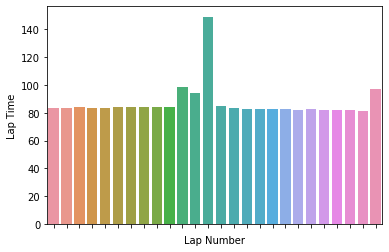

In [57]:
a = sns.barplot(x=np.linspace(0,26,26), y = lec['LapTime'].values[10:36])
a.set(xticklabels=[])
a.set(xlabel = 'Lap Number',ylabel ='Lap Time')

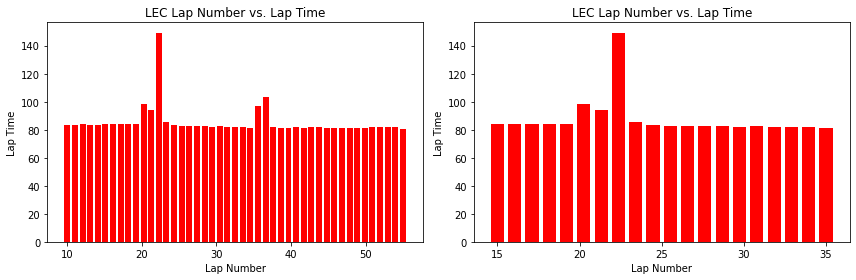

In [70]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,4))

axes[0].bar(np.linspace(10,55,45),lec['LapTime'].values[10:],color = 'Red')
axes[0].set_title('LEC Lap Number vs. Lap Time')
axes[0].set_xlabel('Lap Number')
axes[0].set_ylabel('Lap Time')

axes[1].bar(np.linspace(15,35,20),lec['LapTime'].values[15:35],color='Red')
axes[1].set_title('LEC Lap Number vs. Lap Time')
axes[1].set_xlabel('Lap Number')
axes[1].set_ylabel('Lap Time')

plt.tight_layout()

plt.savefig('LEC_AustralianGP.png', dpi = 1200)
